<a href="https://www.kaggle.com/code/hajarhanifah/pca-modeling-aneka-industri?scriptVersionId=99814946" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/df-aneka-industri-2021-multinomial/dataset financial data ratio aneka industri 2021 (1).csv


***
# PCA Modeling -  Emiten Aneka Industri sub sektor Mesin dan Komponen Industri  Q4 2021 -  HAJAR HANIFAH 
***

Tujuan penelitian ini adalah melakukan PCA Modeling terhadap data emiten saham di sektor aneka industri untuk sub sektor Mesin dan Komponen Industri Q4 2021. 

Menggunakan Data Clustering yang sudah dilakukan sebelumnya. [Clustering Sektor Industri - Aneka Industri 2021](https://www.kaggle.com/code/hajarhanifah/clustering-sektor-industri-hajar-hanifah/edit/run/93274745)

Adapun beberapa step yang akan dilakukan adalah 
1. Import Libraries
2. Exploratory Data Analysis
    - Data Understanding
    - Understanding the Table
    - Load Data
    - Modeling
3. Multinomial logistic regression with scikit-learn
    - Data Preparation
    - Fit The Model
    - Model Validation
    - Probabilitas
 4. Conclution

# PCA Modeling untuk Data Visualization

Dalam aplikasi Machine Learning, PCA Modeling sangat berguna untuk memvisualisasi data yang dimiliki. 

***
# 1. Import Libraries
***

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

***
# 2. Exploratory Data Analysis
***


# 2.1 Data Understanding

Data yang diambil merupakan data statictical financial ratio Q4 2021 dan 2020 untuk seluruh emiten di sektor Industri.

Data di dapatkan dari [IDX - Laporan Statistic Financial Data Ratio](https://www.idx.co.id/data-pasar/laporan-statistik/digital-statistic-beta/financial-data-ratio?q=eyJ5ZWFyIjoiMjAyMSIsIm1vbnRoIjpudWxsLCJxdWFydGVyIjo0LCJ0eXBlIjoieWVhcmx5In0=)


# 2.2 Understanding The Table

* **Emiten :** Pihak yang melakukan penawaran umum, yaitu penawaran efek yang dilakukan oleh emiten untuk menjual efek kepada masyarakat berdasarkan tata cara yang diatur dalam peraturan undang-undang yang berlaku. 
* **Sales Growth :** Kenaikan jumlah penjualan dari tahun ke tahun atau dari waktu ke waktu.
* **ROA (Return of Asset) :** Indikator untuk menunjukkan seberapa untuk sebuah perusahaan dibandingkan dengan total asetnya. 
* **DER (Debt to Equity Ratio) :** Rasio hutang terhadap ekuitas atau rasio keuangan yang membandingkan jumlah hutang dengan ekuitas

Keterangan rasio yang akan digunakan : 
- **DER =** Total Uang / Total Ekuitas
- **Return on Asset =** Laba setelah pajak / Total Asset 
- **Sales Growth =** (penjualan periode 2021 - penjualan periode 2020)/ penjualan periode 2020

# 2.3 Load Data

In [3]:
df = pd.read_csv('../input/df-aneka-industri-2021-multinomial/dataset financial data ratio aneka industri 2021 (1).csv')
df.head()

,No,Industri,Company,Emiten,DER,ROA,Sales Growth,ROE,NPM,Category
0,1,Industrial Machinery & Components,Asahimas Flat Glass Tbk,AMFG,1.32,0.06,0.33,0.13,0.12,1
1,2,Industrial Machinery & Components,PT Ateliers Mecaniques D Indonesie Tbk.,AMIN,1.14,-0.05,0.41,-0.12,-0.13,1
2,3,Industrial Machinery & Components,PT Arita Prima Indonesia Tbk.,APII,0.49,0.05,0.03,0.07,0.13,1
3,4,Industrial Machinery & Components,PT Arkha Jayanti Persada Tbk.,ARKA,3.97,-0.02,0.22,-0.08,-0.16,1
4,5,Industrial Machinery & Components,Arwana Citramulia Tbk,ARNA,0.51,0.21,0.17,0.32,0.25,4


In [4]:
df.describe()

,No,DER,ROA,Sales Growth,ROE,NPM,Category
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.000000,1.897586,0.025517,0.304483,0.021379,-0.053448,1.517241
std,8.514693,3.366741,0.103909,0.431456,0.241568,0.420300,1.121883
min,1.000000,-2.860000,-0.320000,-0.280000,-0.930000,-1.990000,0.000000
25%,8.000000,0.510000,-0.020000,0.030000,-0.080000,-0.050000,1.000000
50%,15.000000,0.880000,0.020000,0.220000,0.040000,0.040000,1.000000
75%,22.000000,1.910000,0.060000,0.410000,0.130000,0.130000,1.000000
max,29.000000,16.330000,0.310000,1.440000,0.520000,0.400000,4.000000


In [5]:
display(df)

,No,Industri,Company,Emiten,DER,ROA,Sales Growth,ROE,NPM,Category
0,1,Industrial Machinery & Components,Asahimas Flat Glass Tbk,AMFG,1.32,0.06,0.33,0.13,0.12,1
1,2,Industrial Machinery & Components,PT Ateliers Mecaniques D Indonesie Tbk.,AMIN,1.14,-0.05,0.41,-0.12,-0.13,1
2,3,Industrial Machinery & Components,PT Arita Prima Indonesia Tbk.,APII,0.49,0.05,0.03,0.07,0.13,1
3,4,Industrial Machinery & Components,PT Arkha Jayanti Persada Tbk.,ARKA,3.97,-0.02,0.22,-0.08,-0.16,1
4,5,Industrial Machinery & Components,Arwana Citramulia Tbk,ARNA,0.51,0.21,0.17,0.32,0.25,4
5,6,Industrial Machinery & Components,Cahayaputra Asa Keramik Tbk,CAKK,0.88,0.03,0.30,0.06,0.07,1
6,7,Industrial Machinery & Components,Communication Cable Systems Indonesia Tbk,CCSI,0.31,0.11,0.79,0.14,0.17,4
7,8,Industrial Machinery & Components,Citatah Tbk,CTTH,2.28,-0.05,-0.17,-0.16,-0.54,1
8,9,Industrial Machinery & Components,Hexindo Adiperkasa Tbk,HEXA,1.38,0.12,0.68,0.29,0.21,4
9,10,Industrial Machinery & Components,Sumi Indo Kabel Tbk,IKBI,0.67,0.01,0.67,0.01,0.01,1


**Mengganti Null dengan 0**

In [6]:
df.fillna(0, inplace=True)

In [7]:
display(df)

,No,Industri,Company,Emiten,DER,ROA,Sales Growth,ROE,NPM,Category
0,1,Industrial Machinery & Components,Asahimas Flat Glass Tbk,AMFG,1.32,0.06,0.33,0.13,0.12,1
1,2,Industrial Machinery & Components,PT Ateliers Mecaniques D Indonesie Tbk.,AMIN,1.14,-0.05,0.41,-0.12,-0.13,1
2,3,Industrial Machinery & Components,PT Arita Prima Indonesia Tbk.,APII,0.49,0.05,0.03,0.07,0.13,1
3,4,Industrial Machinery & Components,PT Arkha Jayanti Persada Tbk.,ARKA,3.97,-0.02,0.22,-0.08,-0.16,1
4,5,Industrial Machinery & Components,Arwana Citramulia Tbk,ARNA,0.51,0.21,0.17,0.32,0.25,4
5,6,Industrial Machinery & Components,Cahayaputra Asa Keramik Tbk,CAKK,0.88,0.03,0.30,0.06,0.07,1
6,7,Industrial Machinery & Components,Communication Cable Systems Indonesia Tbk,CCSI,0.31,0.11,0.79,0.14,0.17,4
7,8,Industrial Machinery & Components,Citatah Tbk,CTTH,2.28,-0.05,-0.17,-0.16,-0.54,1
8,9,Industrial Machinery & Components,Hexindo Adiperkasa Tbk,HEXA,1.38,0.12,0.68,0.29,0.21,4
9,10,Industrial Machinery & Components,Sumi Indo Kabel Tbk,IKBI,0.67,0.01,0.67,0.01,0.01,1


# 2.1 Standardize the Data

PCA dipengaruhi oleh skala / scale, sehingga diperlukan untuk men skalakan fitur dalam data sebelum menerapkan PCA. 
- gunakan StandardScaler untuk membantu menstandarisasi dataset ke unit skala (mean = 0, variance = 1) untuk mengoptimalkan kinerja algoritma dari Machine Learning 
- Untuk melihat efek negatif dari tidak menskalakan dataset, dapat menggunakan sckit-learn

In [8]:
from sklearn.preprocessing import StandardScaler
features = ['DER', 'ROA', 'Sales Growth', 'ROE', 'NPM']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Category']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [9]:
display(df)

,No,Industri,Company,Emiten,DER,ROA,Sales Growth,ROE,NPM,Category
0,1,Industrial Machinery & Components,Asahimas Flat Glass Tbk,AMFG,1.32,0.06,0.33,0.13,0.12,1
1,2,Industrial Machinery & Components,PT Ateliers Mecaniques D Indonesie Tbk.,AMIN,1.14,-0.05,0.41,-0.12,-0.13,1
2,3,Industrial Machinery & Components,PT Arita Prima Indonesia Tbk.,APII,0.49,0.05,0.03,0.07,0.13,1
3,4,Industrial Machinery & Components,PT Arkha Jayanti Persada Tbk.,ARKA,3.97,-0.02,0.22,-0.08,-0.16,1
4,5,Industrial Machinery & Components,Arwana Citramulia Tbk,ARNA,0.51,0.21,0.17,0.32,0.25,4
5,6,Industrial Machinery & Components,Cahayaputra Asa Keramik Tbk,CAKK,0.88,0.03,0.30,0.06,0.07,1
6,7,Industrial Machinery & Components,Communication Cable Systems Indonesia Tbk,CCSI,0.31,0.11,0.79,0.14,0.17,4
7,8,Industrial Machinery & Components,Citatah Tbk,CTTH,2.28,-0.05,-0.17,-0.16,-0.54,1
8,9,Industrial Machinery & Components,Hexindo Adiperkasa Tbk,HEXA,1.38,0.12,0.68,0.29,0.21,4
9,10,Industrial Machinery & Components,Sumi Indo Kabel Tbk,IKBI,0.67,0.01,0.67,0.01,0.01,1


In [10]:
x

array([[-1.74593085e-01,  3.37729925e-01,  6.01890239e-02,
         4.57607212e-01,  4.19982048e-01],
       [-2.29003587e-01, -7.39628535e-01,  2.48889748e-01,
        -5.95615737e-01, -1.85359870e-01],
       [-4.25485955e-01,  2.39788246e-01, -6.47438690e-01,
         2.04833705e-01,  4.44195725e-01],
       [ 6.26450413e-01, -4.45803500e-01, -1.99274471e-01,
        -4.27100065e-01, -2.58000900e-01],
       [-4.19440343e-01,  1.80685510e+00, -3.17212423e-01,
         1.25805665e+00,  7.34759846e-01],
       [-3.07596534e-01,  4.39048902e-02, -1.05737474e-02,
         1.62704787e-01,  2.98913665e-01],
       [-4.79896456e-01,  8.27438315e-01,  1.14521818e+00,
         4.99736130e-01,  5.41050432e-01],
       [ 1.15596258e-01, -7.39628535e-01, -1.11919050e+00,
        -7.64131409e-01, -1.17812062e+00],
       [-1.56456251e-01,  9.25379993e-01,  8.85754690e-01,
         1.13166990e+00,  6.37905139e-01],
       [-3.71075453e-01, -1.51978466e-01,  8.62167099e-01,
        -4.79398032e-02

In [11]:
pca = PCA(n_components=3)

principal_components = pca.fit_transform(x)

new_X = pd.DataFrame(data = principal_components, columns=['PC1','PC2','PC3'])

In [12]:
new_X.head()

,PC1,PC2,PC3
0,-0.676857,-0.098001,-0.210746
1,0.645878,-0.064995,0.414410
2,-0.269784,-0.339275,-0.836648
3,0.800063,0.429666,0.099253
4,-1.943338,-0.311278,-1.018369


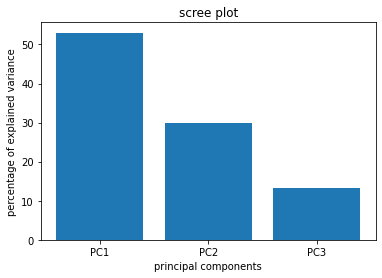

In [13]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals =1)

label = ['PC' + str(x) for x in range (1, len(per_var)+1)]

plt.bar (x=range(1, len(per_var)+1),height=per_var,tick_label=label)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal components')
plt.title('scree plot')
plt.show()

# 2.2 PCA Projection to 2D

- Data original memiliki 5 kolom (untuk X ) yaitu DER, ROI, Sales Frowth, ROE, NPM
- Pada bagian ini, proyeksikan data asli yaitu 5 dimensional data menjadi 2 dimensi 

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [15]:
display(principalDf)

,principal component 1,principal component 2
0,-0.676857,-0.098001
1,0.645878,-0.064995
2,-0.269784,-0.339275
3,0.800063,0.429666
4,-1.943338,-0.311278
5,-0.307970,-0.184485
6,-1.543330,0.042958
7,1.837253,-0.411408
8,-1.780388,-0.004838
9,-0.399009,-0.035664


In [16]:
finalDf = pd.concat([principalDf, df[['Category']]], axis = 1)

In [17]:
display(finalDf)

,principal component 1,principal component 2,Category
0,-0.676857,-0.098001,1
1,0.645878,-0.064995,1
2,-0.269784,-0.339275,1
3,0.800063,0.429666,1
4,-1.943338,-0.311278,4
5,-0.307970,-0.184485,1
6,-1.543330,0.042958,4
7,1.837253,-0.411408,1
8,-1.780388,-0.004838,4
9,-0.399009,-0.035664,1


# 2.3 Visualize 2D Projection

- Plotting 2 dimensional Data
- Perhatikan pada grafik di bawah ini bahwa kelas-kelas tampak terpisah satu sama lain.

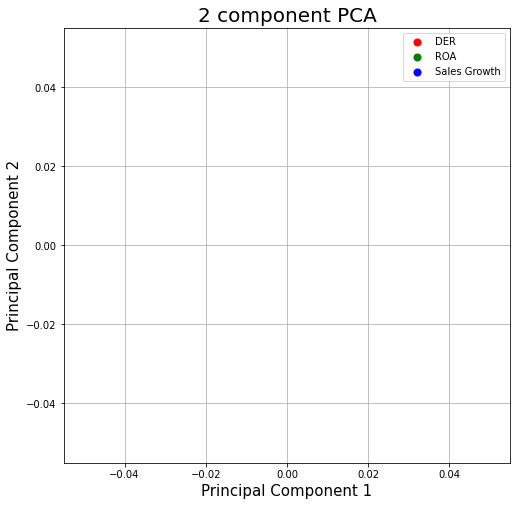

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['DER', 'ROA', 'Sales Growth']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [19]:
pca.explained_variance_ratio_

array([0.52995094, 0.29865841])